# Домашнее задание №7
## Линейная регрессия. Часть 1
### PROC REG

Baigazy Maksat

### 0. Подготовка файлов для выполнения ДЗ.
Вместе с этим файлом в архиве находится программа для создания набора данных _BodyFat_ для выполнения ДЗ: 
- FATDATAREG.sas;

Для вашего удобства в программе создаются макропеременные: с целевой переменной, предикторами и набором данных для анализа.


### Задание


### 1. Предварительное  исследование данных  
С помощью процедуры proc corr исследуйте корреляцию между целевой переменной и предикторами.
- в процедуре постройте графики типа scatter для визуального исследования характера зависимости (использую опции постройте графики для **всех** предикторов);
- сохраните результаты работы процедуры - коэф. корреляции Пирсона и соответствующее p-value по всем предикторам - в набор данных (используйте операторы ods output ...; и ods trace ...;);
- исключите из анализа предикторы для которых нельзя отклонить гипотезу о равенстве коэффициента корреляции нулю (уровень значимости 0.05) и предикторы у которых корреляция < 0.3;
- с помощью процедуры proc sql (конструкция select ... into: separated by ' ') создайте макропеременную inputs, которая будет содержать список оставшихся переменных, разделенных пробелами. 

In [1]:
# Ваш код для выполнения задания (не забудьте запустить его) #
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
# Importing the dataset
col_names = ['Case', 'PctBodyFat1', 'PctBodyFat', 'Density', 'Age', 'Weight', 'Height', 'Adioposity', 'FatFreeWt', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']
df = pd.read_excel('HW7data.xlsx', index_col=0)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
# df.plot(figsize=(18,5))
target = df['PctBodyFat1']
df.head()

,PctBodyFat1,PctBodyFat,Density,Age,Weight,Height,Adioposity,FatFreeWt,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
1,12.6,12.3,1.0708,23,154.25,67.75,23.7,134.9,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,6.9,6.1,1.0853,22,173.25,72.25,23.4,161.3,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,24.6,25.3,1.0414,22,154.00,66.25,24.7,116.0,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,10.9,10.4,1.0751,26,184.75,72.25,24.9,164.7,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,27.8,28.7,1.0340,24,184.25,71.25,25.6,133.1,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


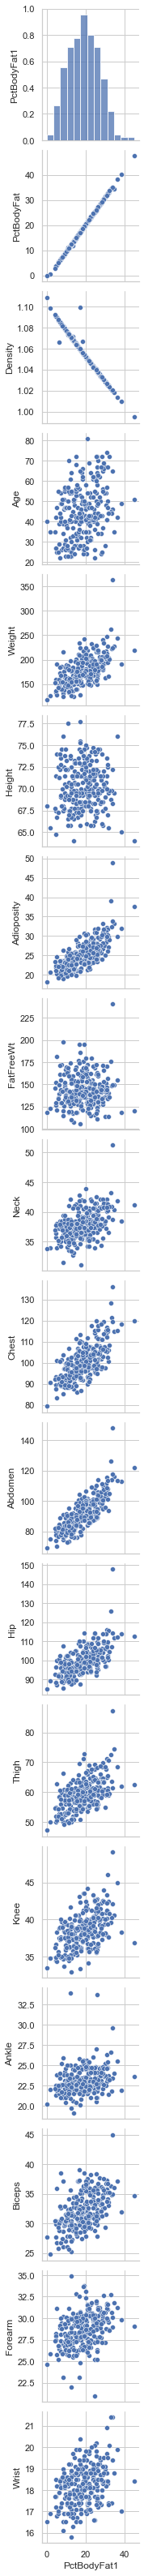

In [2]:
import seaborn as sns
sns.pairplot(data=df, x_vars=['PctBodyFat1'])

            correlation       p-value
PctBodyFat     0.999744  0.000000e+00
Abdomen        0.813706  7.706457e-61
Adioposity     0.727994  7.144152e-43
Chest          0.702885  7.372549e-39


,correlation,p-value
PctBodyFat,0.999744,0.000000e+00
Density,-0.988087,3.280973e-205
Age,0.289174,3.044832e-06
Weight,0.613156,2.059049e-27
Height,-0.024525,6.984306e-01
Adioposity,0.727994,7.144152e-43
FatFreeWt,0.020132,7.504619e-01
Neck,0.491489,9.904320e-17
Chest,0.702885,7.372549e-39
Abdomen,0.813706,7.706457e-61


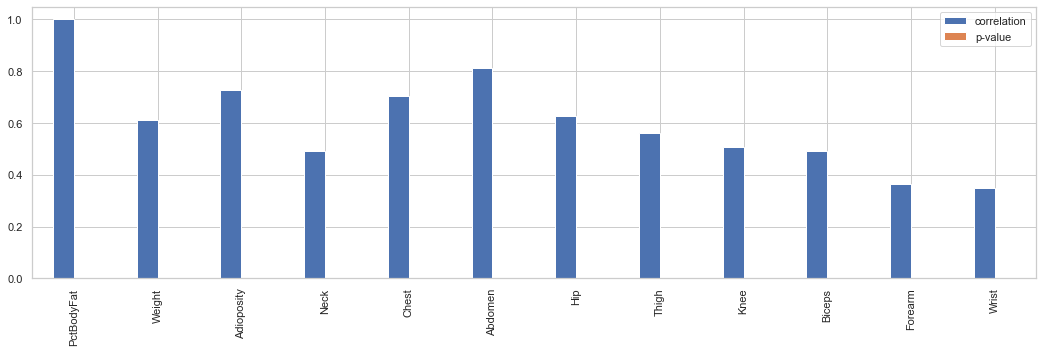

In [3]:
from scipy.stats import pearsonr

# pearsonr: [0] is the correlation value, [1] is the p-value.
correllationAndPVals = {}
for i in col_names[2:]:
    correllationAndPVals[i] = pearsonr(df[i], target)

unfilteredDf = pd.DataFrame.from_dict(correllationAndPVals, orient='index', columns=['correlation', 'p-value'])   

# remove the columns with correlation values less than 0.3 and significance values greater than 0.05
filtered = dict(filter(lambda x: x[1][0] > 0.3 and x[1][1] < 0.05, correllationAndPVals.items()))

filteredDf = pd.DataFrame.from_dict(filtered, orient='index', columns=['correlation', 'p-value'])   
filteredDf.plot(kind='bar', figsize=(18,5))

print(filteredDf.nlargest(4, 'correlation'))
unfilteredDf

#### Q1.1: Укажите переменные:
- 3 переменные с максимальной корреляцией: (1) Abdomen ;(2) Adioposity ;(3) Chest ;
- укажите переменные, для которых коэф. корреляции не отличается значимо от нуля: (1) FatFreeWt ; (2) Height ;

#### Q1.2: Можно ли утверждать, что для 3-х переменных с максимальной корреляцией связь c целевой  действительно линейная? 
I dont know much about this :)

### 2. Выбор моделей кандидатов  
#### 2.1 Пошаговые методы 
Из оставшихся переменных, используя proc reg и метод forward, проведите отбор предикторов. Какой порог на p-value нужно выбрать, чтобы в модель вошло только 5 переменных? Используйте этот порог. Создайте макропеременную model1, содержащую список выбранных переменных и используйте ее, чтобы построить регрессию на этих переменных (еще один запуск proc reg).

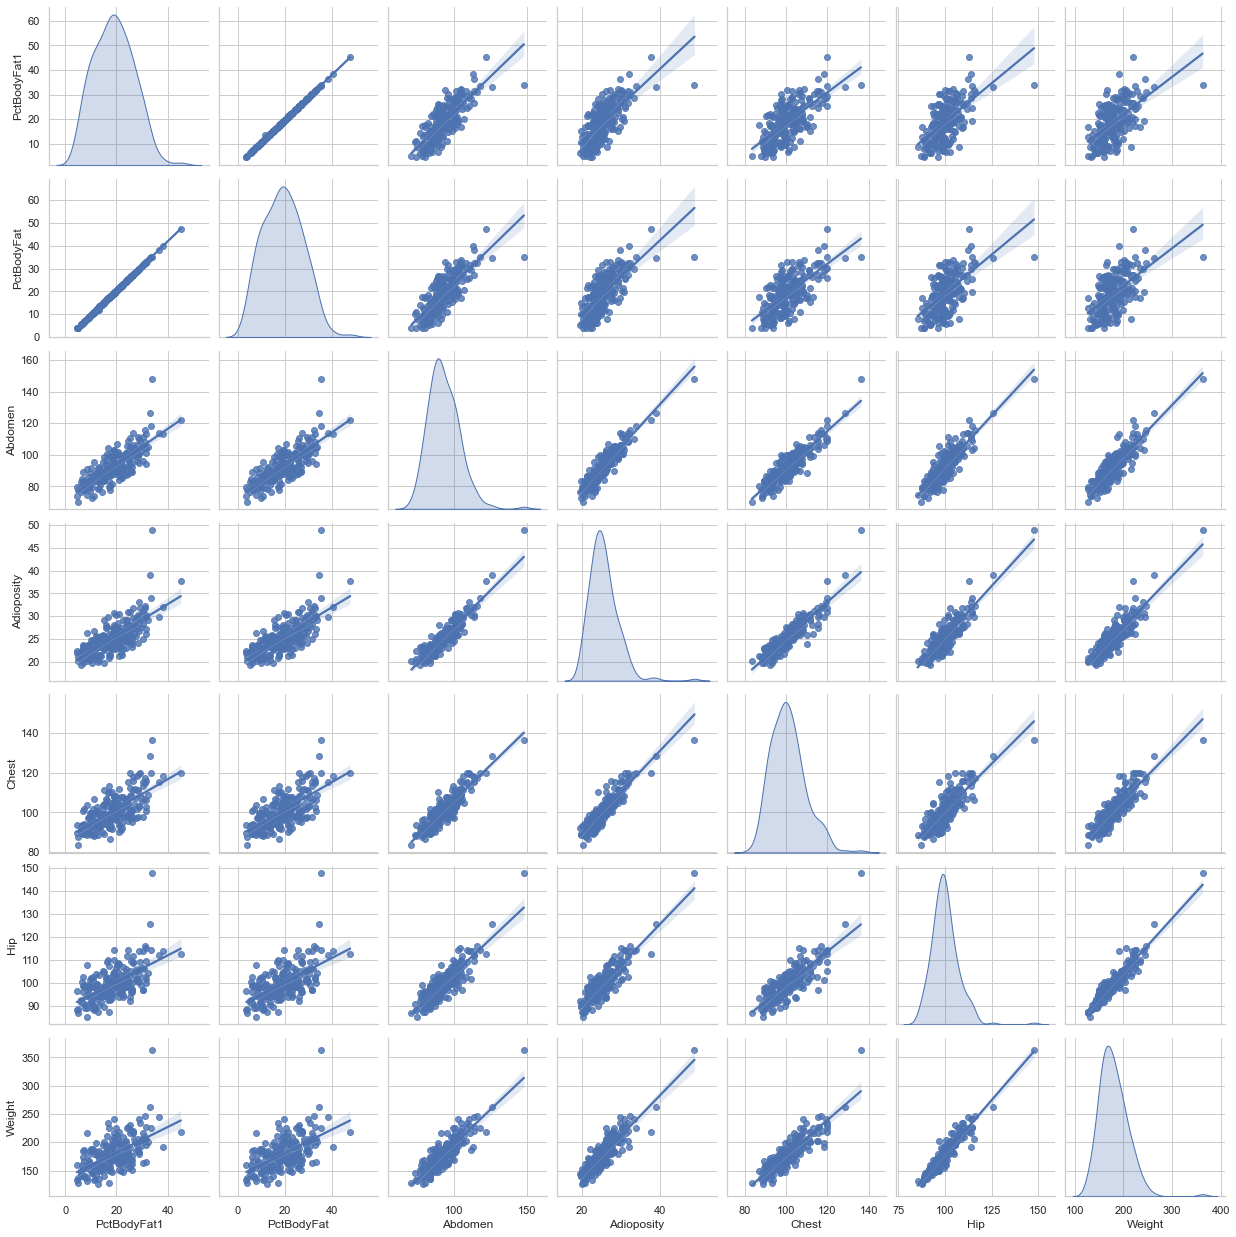

In [4]:
from sklearn.linear_model import LinearRegression

best5byPVal = filteredDf.nsmallest(6, 'p-value')
names = best5byPVal.index.values

# create linear regression model with target PctBodyFat1 and the best 5 features
X = df[names]
y = df['PctBodyFat1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

train_dataset = X_train.copy()
train_dataset.insert(0, 'PctBodyFat1', y_train)
_ = sns.pairplot(train_dataset, kind="reg", diag_kind="kde")



0.9994899452005542
0.9994911579737268
1.2127731725541935e-06
Feature: PctBodyFat, Score: -0.00008
Feature: Abdomen, Score: 0.00470
Feature: Adioposity, Score: -0.00249
Feature: Chest, Score: -0.00275
Feature: Hip, Score: 0.00111


<BarContainer object of 5 artists>

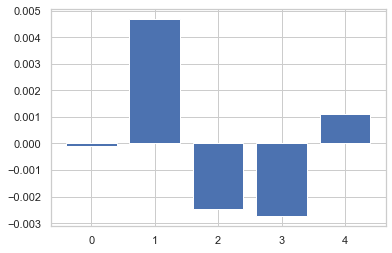

In [5]:

lrWith4Features = LinearRegression() 
lrWith4Features.fit(X.iloc[:,0:5], y)

rSquaredWith4 = lrWith4Features.score(X.iloc[:,0:5], y)
print(rSquaredWith4)


lrWith5Features = LinearRegression()
lrWith5Features.fit(X, y)

rSquaredWith5 = lrWith5Features.score(X, y)
print(rSquaredWith5)
print(rSquaredWith5 - rSquaredWith4)

importance = lrWith5Features.coef_[1:]

for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (names[i],v))
plt.bar([i for i in range(len(importance))], importance)


#### Q2.1.1: На сколько увеличился R-квадрат модели, когда 5-я переменная была добавлена? 
1.2127731725541935e-06
#### Q2.1.2 Какая переменная наиболее значимая в модели, какая  наименее? Почему вы так решили?
Abdomen, google search showed me how to get the importance coeff :smiley:

#### 2.2 Перебор подмножеств
Определите набор предикторов (не более 5), при использовании которых можно получить модель не хуже (в качестве метрики для выборо используйте RMSE), чем в п. 2.1. Создайте макропеременную model2, содержащую список выбранных переменных и используйте ее, чтобы построить регрессию на этих переменных (еще один запуск proc reg).

Feature: Thigh, Score: 0.47739
Feature: Knee, Score: 0.34529
Feature: Biceps, Score: 0.21453
Feature: Neck, Score: 0.48797
Feature: Forearm, Score: -0.12239


0.3409098987038812

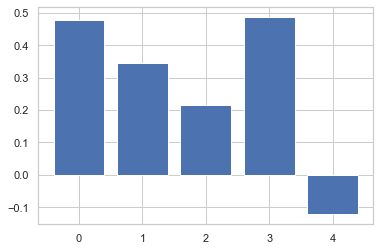

In [6]:
next5byPVal = filteredDf.nsmallest(11, 'p-value')[6:]
names2 = next5byPVal.index.values

X2 = df[names2]
y2 = df['PctBodyFat1']
model2 = LinearRegression()
model2.fit(X2, y2)

importance2 = model2.coef_

for i,v in enumerate(importance2):
	print('Feature: %s, Score: %.5f' % (names2[i],v))
plt.bar([i for i in range(len(importance2))], importance2)
rSquaredModel2 = model2.score(X2, y2)
rSquaredModel2

#### Q2.2.1: Удалось ли построить модель лучше? 
Well, the 1st model's R-squared is above 0.9, and the model2's R-squared is ~0.34, i guess 1st model is better

### 3. Проверка предположений  
Выберете лучшую модель из двух, построенных ранее. Проверьте предположения регрессионного анализа для нее.

In [7]:
import statsmodels.api as sm

olsModel1 = sm.OLS(y, X).fit()
olsModel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            PctBodyFat1   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.374e+05
Date:                Thu, 03 Mar 2022   Prob (F-statistic):                        0.00
Time:                        20:21:05   Log-Likelihood:                          76.415
No. Observations:                 252   AIC:                                     -140.8
Df Residuals:                     246   BIC:                                     -119.7
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PctBodyFat     0.9232      0.002    369.933      0.000       0.918       0.928
Abdomen        0.0002      0.004      0.060      0.952      -0.008       0.008
Adioposity    -0.0087      0.009     -0.967      0.334      -0.026       0.009
Chest          0.0071      0.003      2.243      0.026       0.001       0.013
Hip            0.0126      0.003      4.439      0.000       0.007       0.018
Weight        -0.0029      0.001     -3.251      0.001      -0.005      -0.001
==============================================================================
Omnibus:                      270.746   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28685.780
Skew:                           3.940   Prob(JB):                         0.00
Kurtosis:                      54.671   Cond. No.                         201.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
olsModel2 = sm.OLS(y2, X2).fit()
olsModel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            PctBodyFat1   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.891
Method:                 Least Squares   F-statistic:                              411.3
Date:                Thu, 03 Mar 2022   Prob (F-statistic):                   1.54e-117
Time:                        20:21:05   Log-Likelihood:                         -836.86
No. Observations:                 252   AIC:                                      1684.
Df Residuals:                     247   BIC:                                      1701.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Thigh          0.6411      0.155      4.146      0.000       0.336       0.946
Knee          -0.4062      0.276     -1.473      0.142      -0.950       0.137
Biceps         0.5256      0.252      2.082      0.038       0.028       1.023
Neck          -0.0649      0.266     -0.244      0.807      -0.588       0.458
Forearm       -0.6225      0.285     -2.187      0.030      -1.183      -0.062
==============================================================================
Omnibus:                        1.850   Durbin-Watson:                   1.473
Prob(Omnibus):                  0.397   Jarque-Bera (JB):                1.928
Skew:                           0.197   Prob(JB):                        0.381
Kurtosis:                       2.831   Cond. No.                         73.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Q3.1: Укажите какие предположения выполнены, а какие нет? Обязательно объясните на основании чего вы сделали такой вывод.
I think I will need to rewatch lecture for that, i remember you explaining everything in lecture, but i dont remember exactly


### 4. Поиск и исключение влиятельных наблюдений 
Используя статистику Cook's D, найдите два наиболее влятельных наблюдения в данных. Удалите их из набора.

In [100]:
from statsmodels.stats.outliers_influence import OLSInfluence

y4 = df['PctBodyFat']
x4 = df[col_names[1:]].drop(['PctBodyFat', 'PctBodyFat1'], axis=1)

model4 = sm.OLS(y4, x4).fit()


influence = model4.get_influence()
sm_fr = influence.summary_frame()
# get top 2 rows by cooks distance
sm_fr.sort_values(by='cooks_d', ascending=False, inplace=True)
topTwoCd = sm_fr['cooks_d'].head(2)
topTwoCd
recomendedCooksDVal = 4 / len(sm_fr)
print(topTwoCd)
# get all cooks_d vals greater than recomendedCooksDVal
outliers = sm_fr.loc[sm_fr['cooks_d'] > recomendedCooksDVal]
len(outliers)

39     0.795350
163    0.446198
Name: cooks_d, dtype: float64


19

#### Q4.1: Укажите номера найденных влиятельных наблюдений
(1) 39;
(2) 163;
#### Q4.2: Используя рекомендуемый порог для статитстики Cook's D - сколько наблюдений нужно было бы удалить?
19

### 5. Исследодвание коллинеарности
Проведите исследование на наборе с удаленными влиятельными наблюдениями. Используйте опцию VIF, чтобы выявить наиболее проблемную переменную, и опцию collinoint, чтобы выявить с какими переменными найденная проблемная коррелирует.  

In [102]:
# create new model without outliers rows
x5 = x4.drop(outliers.index)
y5 = y4.drop(outliers.index)
# x5 without PctBodyFat PctBodyFat1
x5
model5 = sm.OLS(y5, x5).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             PctBodyFat   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.067e+04
Date:                Thu, 03 Mar 2022   Prob (F-statistic):                   2.55e-304
Time:                        21:02:36   Log-Likelihood:                         -258.92
No. Observations:                 233   AIC:                                      549.8
Df Residuals:                     217   BIC:                                      605.0
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Density     -111.9350      6.186    -18.094      0.000    -124.128     -99.742
Age            0.0068      0.006      1.095      0.275      -0.005       0.019
Weight        -0.0181      0.025     -0.723      0.470      -0.067       0.031
Height         1.7817      0.104     17.090      0.000       1.576       1.987
Adioposity     2.1806      0.164     13.297      0.000       1.857       2.504
FatFreeWt     -0.4426      0.010    -43.154      0.000      -0.463      -0.422
Neck           0.1147      0.047      2.432      0.016       0.022       0.208
Chest          0.0287      0.021      1.350      0.179      -0.013       0.071
Abdomen        0.0370      0.020      1.840      0.067      -0.003       0.077
Hip           -0.0096      0.028     -0.342      0.733      -0.065       0.046
Thigh          0.1256      0.029      4.357      0.000       0.069       0.182
Knee           0.0036      0.051      0.071      0.944      -0.096       0.103
Ankle          0.0091      0.050      0.182      0.856      -0.090       0.108
Biceps         0.0942      0.035      2.657      0.008       0.024       0.164
Forearm        0.0123      0.043      0.286      0.775      -0.072       0.097
Wrist          0.1241      0.105      1.178      0.240      -0.084       0.332
==============================================================================
Omnibus:                        0.311   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.856   Jarque-Bera (JB):                0.138
Skew:                          -0.042   Prob(JB):                        0.934
Kurtosis:                       3.085   Cond. No.                     3.89e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

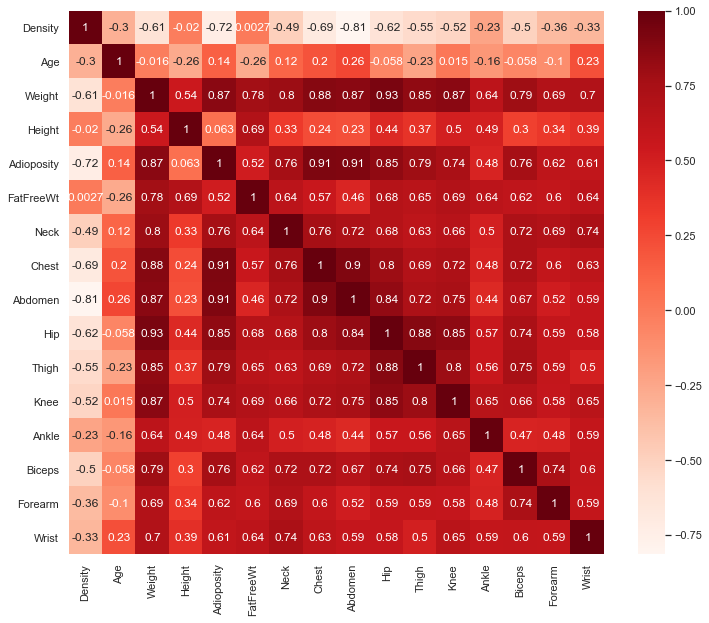

Density       17129.138154
Age              33.641818
Weight         8099.319682
Height        21598.205014
Adioposity     7006.955552
FatFreeWt       877.283409
Neck           1290.668621
Chest          1845.736037
Abdomen        1392.374984
Hip            3163.475362
Thigh          1177.140686
Knee           1535.803792
Ankle           536.114231
Biceps          527.979800
Forearm         612.487886
Wrist          1476.925277
dtype: float64

In [108]:
plt.figure(figsize=(12,10))
cor = x5.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.Series([variance_inflation_factor(x5.values, i) 
    for i in range(x5.shape[1])], 
    index=x5.columns)
vif

#### Q5.1: Укажите наиболее проблемную переменную, почему вы ее выбрали?
(1) Height, because of the highes VIF (A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model)
#### Q5.2: С какими переменными она коррелирует? Почему? 
(1)  Weird thing is the heatmap of correlation shows that the height is not the most correlated with the other variables.
Looking at the values of Height corr, it highly correlates with FatFreeWt (0.69) and Weight (0.54)
 
**Подтвердите свои выводы запуском процедуры proc corr:**

#### Q5.3: Подтвердились ли выводы? Почему Вы так решили? 
...;
#### Q5.4 Удалите из модели проблемную и наиболее коррелирующую с ней? Как изменилась метрика RMSE?
Before it was 0.73, after it is 1.76, i guess it was not correct to remove the variables, because now it overfits i guess 

In [111]:
# create new model without outliers rows
from statsmodels.tools.eval_measures import rmse

x6 = x5.drop(['Height', 'Weight'], axis=1)
y6 = y5
# x5 without PctBodyFat PctBodyFat1
x5
model6 = sm.OLS(y6, x6).fit()
rmseBefore = rmse(y5, model5.predict(x5))
rmseAfter = rmse(y6, model6.predict(x6))
print('Before: %.5f, After: %.5f' % (rmseBefore, rmseAfter))

Before: 0.73513, After: 1.76822
